**Borrador de Pruebas - N2N**

Pruebas de Modelo clasico - Incluyendo Ground Truth 

Cargamos Librerias y el dataset para trabajar con el

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [2]:
# Carga del dataset de imágenes (por ejemplo, MNIST)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Visualizamos algunos ejemplos de que tan diversos pueden ser los numeros entre si y las guardo para hacer pruebas mas adelante

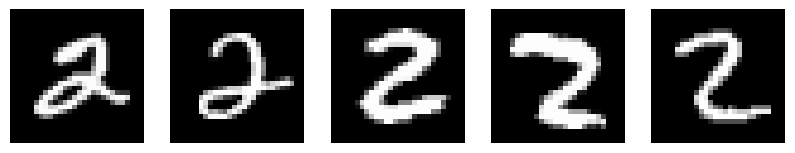

In [4]:
# Directorio donde se guardarán las imágenes
dir_imagenes = 'imagenes_guardadas_limpias'

# Asegurarse de que el directorio existe
os.makedirs(dir_imagenes, exist_ok=True)

# Número específico que deseas mostrar (cámbialo al número que quieras)
numero_a_mostrar = 2
# Número de ejemplos a mostrar
num_ejemplos = 5

# Obtener índices de imágenes que contienen el número 'numero_a_mostrar' en el conjunto de entrenamiento
indices_entrenamiento = np.where(y_train == numero_a_mostrar)[0][:num_ejemplos]

# Mostrar las primeras 'num_ejemplos' imágenes que contienen el número 'numero_a_mostrar'
plt.figure(figsize=(10, 2))
for i, idx in enumerate(indices_entrenamiento):
    plt.subplot(1, num_ejemplos, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.axis('off')
    
    # Guardar la imagen
    ruta_imagen = os.path.join(dir_imagenes, f'imagen_{i}.png')
    plt.imsave(ruta_imagen, x_train[idx], cmap='gray')

plt.show()

Como paso 1 , dividimos la dimension de la imagen entre 255 para obtener valores entre 0 y 1 para la escala de grises y lo transformamos a dato tipo float, como segundo punto añadimos ruido gaussiano aleatorio a train y al test

In [5]:
# Normalización de los datos
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Agregando ruido gaussiano a las imágenes de entrenamiento y prueba
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# Asegurando que los valores estén entre 0 y 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Compruebo que el ruido ha sido agregado tanto en el train como el test

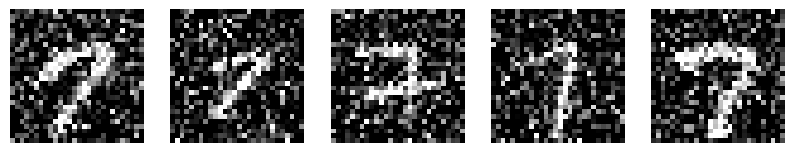

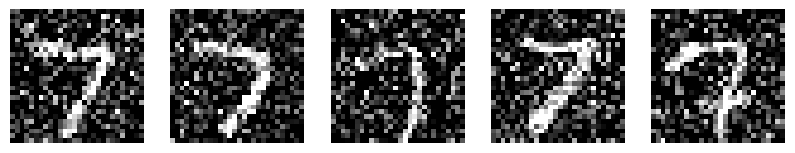

In [6]:
# Directorio donde se guardarán las imágenes
dir_imagenes = 'imagenes_guardadas_noisy'

# Asegurarse de que el directorio existe
os.makedirs(dir_imagenes, exist_ok=True)

# Número específico que deseas mostrar (cámbialo al número que quieras)
numero_a_mostrar = 7

# Número de ejemplos a mostrar
num_ejemplos = 5

# Obtener índices de imágenes que contienen el número 'numero_a_mostrar' en el conjunto de entrenamiento
indices_entrenamiento_2 = np.where(y_train == numero_a_mostrar)[0][:num_ejemplos]

# Mostrar las primeras 'num_ejemplos' imágenes que contienen el número 'numero_a_mostrar'
plt.figure(figsize=(10, 2))
for i, idx in enumerate(indices_entrenamiento_2):
    plt.subplot(1, num_ejemplos, i + 1)
    plt.imshow(x_train_noisy[idx], cmap='gray')
    plt.axis('off')
plt.show()

# Obtener índices de imágenes que contienen el número 'numero_a_mostrar' en el conjunto de entrenamiento
indices_entrenamiento_3 = np.where(y_test == numero_a_mostrar)[0][:num_ejemplos]

# Mostrar las primeras 'num_ejemplos' imágenes que contienen el número 'numero_a_mostrar'
plt.figure(figsize=(10, 2))
for i, idx in enumerate(indices_entrenamiento_3):
    plt.subplot(1, num_ejemplos, i + 1)
    plt.imshow(x_test_noisy[idx], cmap='gray')
    plt.axis('off')
    
    # Guardar la imagen
    ruta_imagen = os.path.join(dir_imagenes, f'imagen_{i}.png')
    plt.imsave(ruta_imagen, x_test_noisy[idx], cmap='gray')
plt.show()




In [7]:
print(indices_entrenamiento)
print(indices_entrenamiento_2)

[ 5 16 25 28 76]
[15 29 38 42 52]


Entreno mi primera red, segun una revision bibliográfica puedo obtener que una arquitectura con autoencoders clasica podria dar mejores resultados en una fase inicial por lo que empezare explorando la misma.

Reducí ligeramente el factor de ruido para no sobrecargar el modelo.
Introduje regularización L2 en las capas convolucionales para ayudar a controlar el sobreajuste.
Ajusté la tasa de aprendizaje y aumenté el número de filtros en las capas convolucionales para permitir al modelo capturar características más complejas.

Obteniendo buenos resultados, como era de esperarse pero esto no es N2N.

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 98ms/step - loss: 0.3860 - val_loss: 0.1344
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - loss: 0.1309 - val_loss: 0.1187
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - loss: 0.1186 - val_loss: 0.1134
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - loss: 0.1140 - val_loss: 0.1107
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - loss: 0.1115 - val_loss: 0.1085
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - loss: 0.1097 - val_loss: 0.1073
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - loss: 0.1083 - val_loss: 0.1071
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - loss: 0.1072 - val_loss: 0.1059
Epoch 9/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - loss: 0.1064 - val_loss: 0.1052
Epoch 10/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - loss: 0.1059 - val_loss: 0.1048
Epoch 11/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - loss: 0.1051 - val_loss: 0.1035
Epoch 12/25
469/469 ━━━━━━━━━━

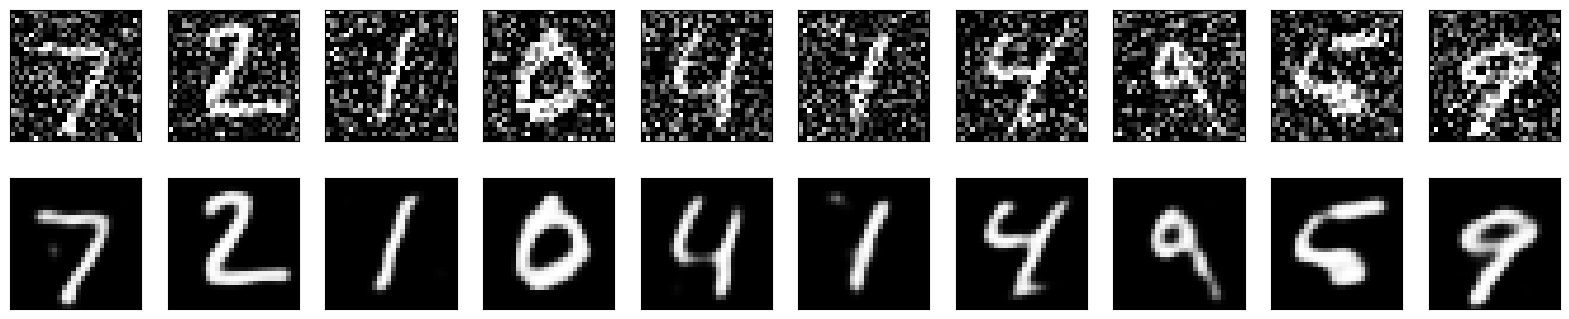

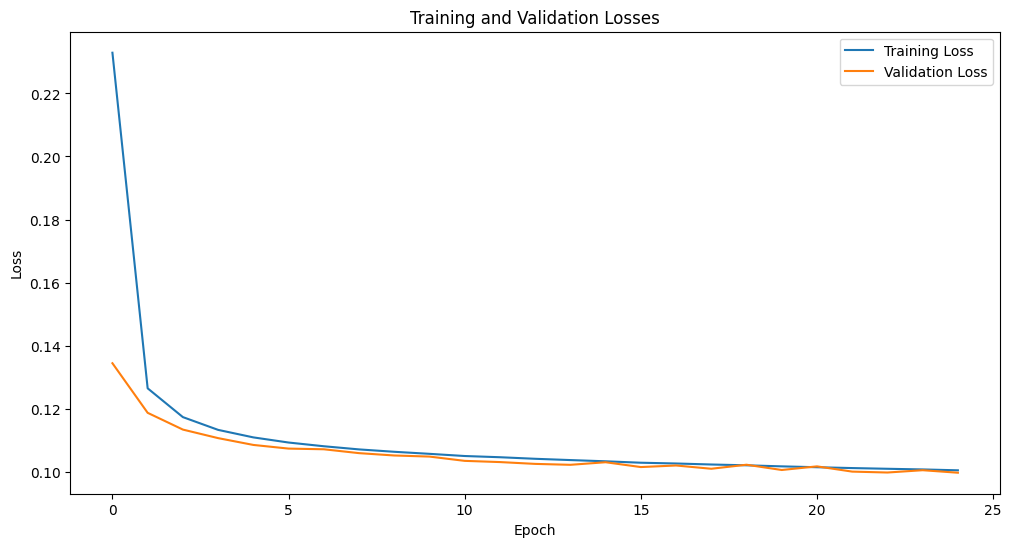

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Agregando ruido gaussiano a las imágenes de entrenamiento y prueba con un factor ajustado
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# Asegurando que los valores estén entre 0 y 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Definición de hiperparámetros
batch_size = 128
epochs = 25
learning_rate = 0.0005
encoder_filters = 64
decoder_filters = 64
l2_reg = 0.001

# Definición del modelo de autoencoder
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(encoder_filters, (3, 3), activation='relu', padding='same', 
           kernel_regularizer=l2(l2_reg))(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(encoder_filters*2, (3, 3), activation='relu', padding='same', 
           kernel_regularizer=l2(l2_reg))(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(decoder_filters*2, (3, 3), activation='relu', padding='same', 
           kernel_regularizer=l2(l2_reg))(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(decoder_filters, (3, 3), activation='relu', padding='same', 
           kernel_regularizer=l2(l2_reg))(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy')

# Entrenamiento del modelo
history = autoencoder.fit(x_train_noisy, x_train, 
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

# Testeo del modelo
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualización de resultados
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagen reconstruida
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Graficar las curvas de pérdida de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Para esta segunda red lo que cambia esta en el fit de la red, entrenaremos contra el dataset ruidoso contra si mismo. Además Batch Normalization puede acelerar la convergencia y hacer el entrenamiento más estable.

Lo que podemos concluir de este modelo es que el encoder aprendio el ruido. Por lo que no nos es atractiva.

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - loss: 0.5312 - val_loss: 0.4891
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 80ms/step - loss: 0.4135 - val_loss: 0.4013
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 81ms/step - loss: 0.3909 - val_loss: 0.3719
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - loss: 0.3817 - val_loss: 0.3579
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - loss: 0.3758 - val_loss: 0.3510
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - loss: 0.3721 - val_loss: 0.3489
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - loss: 0.3703 - val_loss: 0.3471
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - loss: 0.3690 - val_loss: 0.3465
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - loss: 0.3682 - val_loss: 0.3453
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - loss: 0.3676 - val_loss: 0.3440
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - loss: 0.3671 - val_loss: 0.3436
Epoch 12/20
469/469 ━━━━━━━━━━

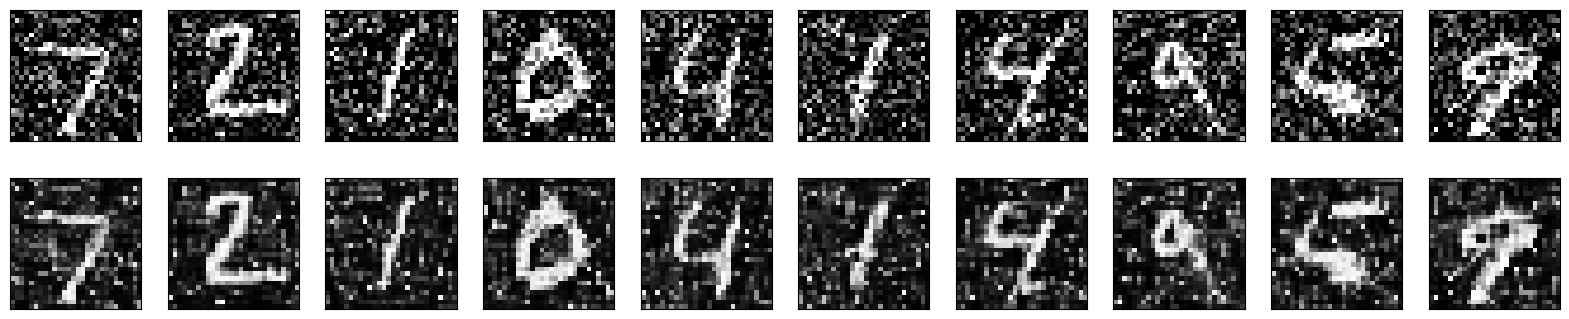

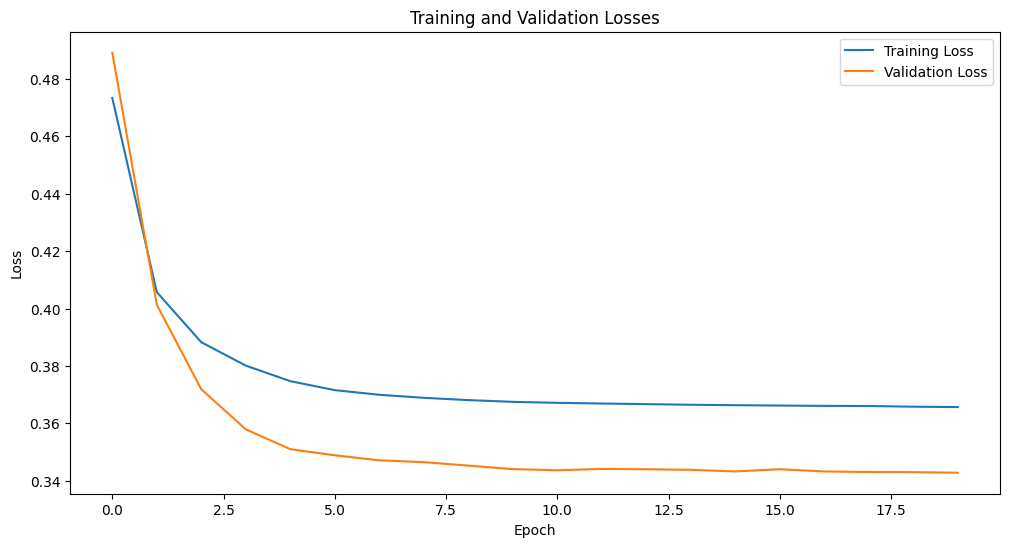

In [10]:

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Agregando ruido gaussiano a las imágenes de entrenamiento y prueba con un factor ajustado
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# Asegurando que los valores estén entre 0 y 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


# Definición de hiperparámetros
batch_size = 128
epochs = 20
learning_rate = 0.001
encoder_filters = 32
decoder_filters = 32
l2_reg = 0.0001  # Regularización L2 ligera

# Definición del modelo de autoencoder
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(encoder_filters, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg))(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.25)(x)  # Dropout para regularización
x = Conv2D(encoder_filters*2, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg))(x)
x = BatchNormalization()(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(decoder_filters*2, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg))(encoded)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
x = Dropout(0.25)(x)  # Dropout para regularización
x = Conv2D(decoder_filters, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg))(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy')

# Entrenamiento del modelo manteniendo tus especificaciones de target y validación
history = autoencoder.fit(x_train_noisy, x_train_noisy,
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test_noisy))

# Testeo del modelo
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualización de resultados
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagen reconstruida
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Graficar las curvas de pérdida de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



Para esta segunda red lo que cambia esta en el fit de la red, validando con el x_test (ground truth) y en una segunda prueba el x_test_noisy (ground Truth ruidoso), es decir generamos ruido independiente lo que le otorga una mayor diversidad de ruido al modelo, mantenemos la misma arquitectura.

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 93s 191ms/step - loss: 0.5858 - val_loss: 0.4058
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 191ms/step - loss: 0.3106 - val_loss: 0.3592
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 91s 193ms/step - loss: 0.2979 - val_loss: 0.3551
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 91s 195ms/step - loss: 0.2945 - val_loss: 0.3901
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 181ms/step - loss: 0.2926 - val_loss: 0.3724
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 181ms/step - loss: 0.2916 - val_loss: 0.4042
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 184ms/step - loss: 0.2908 - val_loss: 0.3724
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 89s 190ms/step - loss: 0.2904 - val_loss: 0.3794
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 181ms/step - loss: 0.2900 - val_loss: 0.3846
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 88s 188ms/step - loss: 0.2899 - val_loss: 0.3846
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 191ms/step - loss: 0.2894 - val_loss: 0.3858
Epoch 12/20
469/469

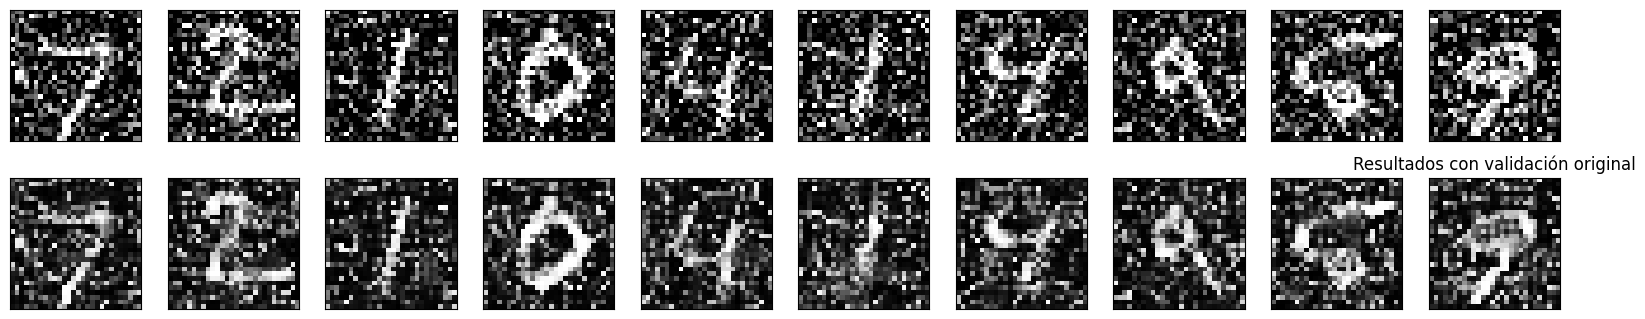

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


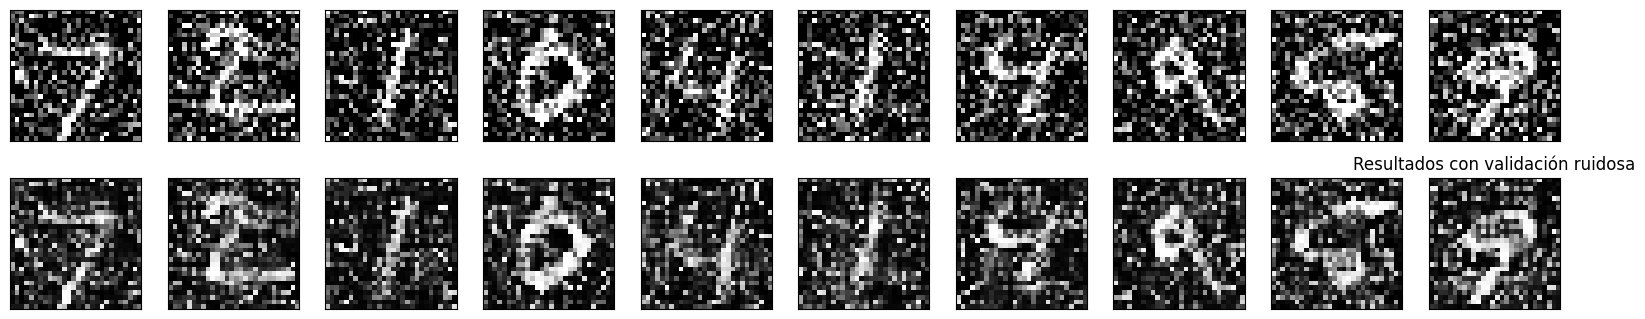

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Cargar el conjunto de datos MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Agregando ruido gaussiano a las imágenes de entrenamiento y prueba
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy_2 = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy_2 = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# Asegurando que los valores estén entre 0 y 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
x_train_noisy_2 = np.clip(x_train_noisy, 0., 1.)
x_test_noisy_2 = np.clip(x_test_noisy, 0., 1.)

# Definición de hiperparámetros
batch_size = 128
epochs = 20
learning_rate = 0.001
encoder_filters = 64
decoder_filters = 64
l2_reg = 0.001

# Definición del modelo de autoencoder
def build_autoencoder():
    input_img = Input(shape=(28, 28, 1))
    x = Conv2D(encoder_filters, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg))(input_img)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Dropout(0.25)(x)
    x = Conv2D(encoder_filters*2, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg))(x)
    x = BatchNormalization()(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(decoder_filters*2, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg))(encoded)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(decoder_filters, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy')
    return autoencoder

# Entrenamiento con primer conjunto de validación
autoencoder1 = build_autoencoder()
history1 = autoencoder1.fit(x_train_noisy, x_train_noisy_2,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Entrenamiento con segundo conjunto de validación
autoencoder2 = build_autoencoder()
history2 = autoencoder2.fit(x_train_noisy, x_train_noisy_2,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy_2))

# Función para visualizar los resultados
def visualize_results(autoencoder, x_test_noisy, title):
    decoded_imgs = autoencoder.predict(x_test_noisy)
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Imagen original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test_noisy[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Imagen reconstruida
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.title(title)
    plt.show()

# Visualización de resultados para ambos modelos
visualize_results(autoencoder1, x_test_noisy, "Resultados con validación original")
visualize_results(autoencoder2, x_test_noisy, "Resultados con validación ruidosa")

# Guardar el primer modelo
autoencoder1.save('autoencoder1_model.h5')

# Guardar el segundo modelo
autoencoder2.save('autoencoder2_model.h5')

Resultados de modelo doble: 

En esta parte exporto el modelo y lo pruebo con imagenes ruidosas que almacene en mi ordenador.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


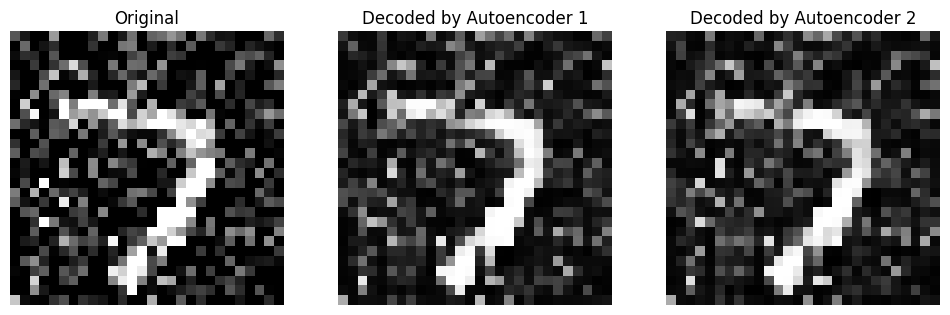

In [45]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

# Cargar los modelos
autoencoder1 = load_model('autoencoder1_model.h5')
autoencoder2 = load_model('autoencoder2_model.h5')

# Ruta de la imagen
ruta_imagen = 'C:/Users/TSE LATAM/Documents/Navarra/TFM/imagenes_guardadas_noisy/imagen_1.png'

# Cargar la imagen
img = load_img(ruta_imagen, color_mode='grayscale', target_size=(28, 28))
img_array = img_to_array(img)

# Normalizar la imagen si tus datos de entrenamiento también fueron normalizados
img_array = img_array.astype('float32') / 255.0

# Asegurarse de que la imagen tiene la forma correcta
img_array = img_array.reshape((1, 28, 28, 1))

# Usar los modelos para predecir la imagen
decoded_img1 = autoencoder1.predict(img_array)
decoded_img2 = autoencoder2.predict(img_array)

# Crear una nueva figura con un tamaño específico más grande para una mejor visualización
plt.figure(figsize=(12, 4))

# Mostrar la imagen original
plt.subplot(1, 3, 1)
plt.imshow(img_array[0].reshape(28, 28), cmap='gray')
plt.title('Original')
plt.axis('off')

# Mostrar la imagen resultante del autoencoder1
plt.subplot(1, 3, 2)
plt.imshow(decoded_img1[0].reshape(28, 28), cmap='gray')
plt.title('Decoded by Autoencoder 1')
plt.axis('off')

# Mostrar la imagen resultante del autoencoder2
plt.subplot(1, 3, 3)
plt.imshow(decoded_img2[0].reshape(28, 28), cmap='gray')
plt.title('Decoded by Autoencoder 2')
plt.axis('off')

# Mostrar todas las imágenes
plt.show()


Sugiero como alternativa incrementar la cantidad del tamaño del dataset con data aumentation, incluyendo zoom, desplazamientos horizontales, verticales y rotacion de 30º, para duplicar el tamaño de la base.

In [46]:
from keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape para ser [samples, width, height, channels]
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))

# Convertir de int a float y normalizar
x_train = x_train.astype('float32') / 255

# Definir el generador de datos con configuraciones de aumento de imagen
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

# Ajustar los parámetros del generador de datos
datagen.fit(x_train)

# Crear 60,000 nuevas imágenes utilizando un bucle eficiente
num_new_images = 60000
new_images = []
new_labels = []

# Utilizar un iterador para optimizar la generación de imágenes
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=1):
    new_images.append(X_batch[0])
    new_labels.append(y_batch[0])
    if len(new_images) >= num_new_images:
        break

# Convertir las listas a arrays
new_images = np.array(new_images)
new_labels = np.array(new_labels)

# Agregar las nuevas imágenes y etiquetas a los datos de entrenamiento existentes
x_train_augmented = np.concatenate((x_train, new_images))
y_train_augmented = np.concatenate((y_train, new_labels))


Verificamos el tamaño del dataset nuevo

In [47]:
x_train_augmented.shape

(120000, 28, 28, 1)

Ahora procedemos a agregar ruido a este dataset aumentado , en este caso sera ruido normal ya que agregar ruidos distintos no genero informacion de valor, repetimos el procedimiento y entrenamos por 40 epochs. Con la misma arquitectura y graficando los resultados al final , como vemos cuando ingresamos los datos del test , nos reconstruye la imagen muy bien , por lo que este modelo promete, sin embargo debemos ponerlo a prueba.

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 193s 203ms/step - loss: 0.6474 - val_loss: -36.0102
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 193s 206ms/step - loss: 0.5271 - val_loss: -45.5850
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 193s 206ms/step - loss: 0.5267 - val_loss: -58.3127
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 194s 207ms/step - loss: 0.5262 - val_loss: -53.9036
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 193s 206ms/step - loss: 0.5260 - val_loss: -43.8419
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 190s 203ms/step - loss: 0.5257 - val_loss: -62.3985
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 186s 198ms/step - loss: 0.5256 - val_loss: -50.6016
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 175s 186ms/step - loss: 0.5254 - val_loss: -39.8158
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 187s 200ms/step - loss: 0.5252 - val_loss: -49.1882
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 191s 203ms/step - loss: 0.5252 - val_loss: -52.2776
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


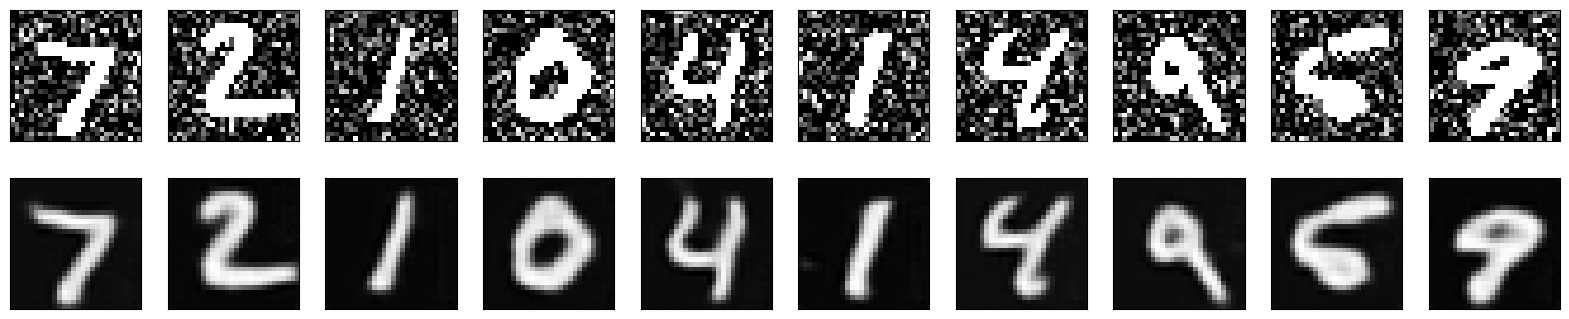

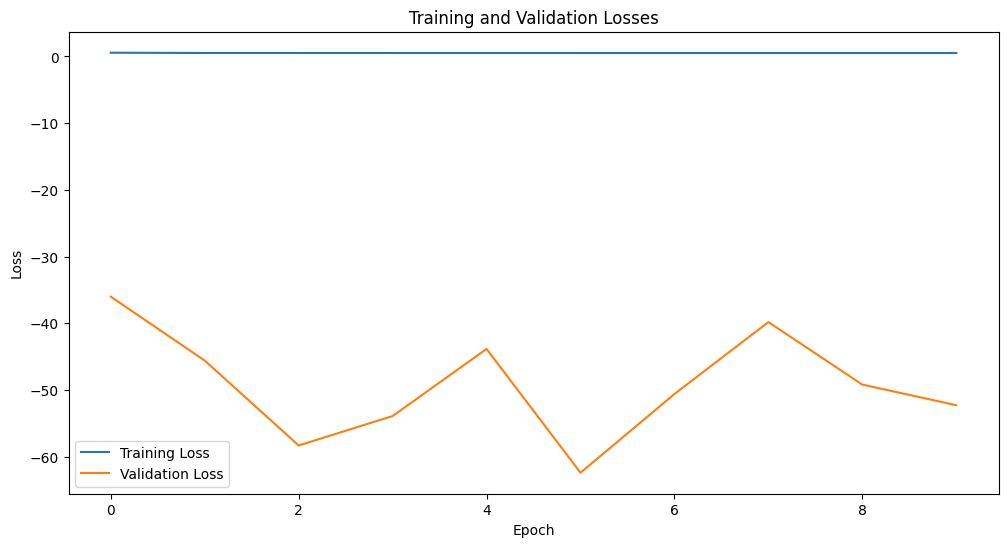

In [50]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt

# Cargar el conjunto de datos MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Agregando ruido gaussiano a las imágenes de entrenamiento y prueba con 40 epochs
noise_factor = 0.5
x_train_noisy = x_train_augmented + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_augmented.shape) 
x_train_noisy_2 = x_train_augmented + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_augmented.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_test_noisy_2 = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Asegurando que los valores estén entre 0 y 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_train_noisy_2 = np.clip(x_train_noisy_2, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
x_test_noisy_2 = np.clip(x_test_noisy_2, 0., 1.)
# Definición de hiperparámetros
batch_size = 128
epochs = 10
learning_rate = 0.001
encoder_filters = 64  # Aumento en el número de filtros
decoder_filters = 64
l2_reg = 0.001  # Regularización L2

# Definición del modelo de autoencoder
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(encoder_filters, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg))(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.25)(x)  # Dropout para evitar el sobreajuste
x = Conv2D(encoder_filters*2, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg))(x)
x = BatchNormalization()(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(decoder_filters*2, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg))(encoded)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
x = Dropout(0.25)(x)  # Dropout para evitar el sobreajuste
x = Conv2D(decoder_filters, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg))(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy')

# Entrenamiento del modelo
history = autoencoder.fit(x_train_noisy, x_train_noisy_2,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


# Testeo del modelo
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualización de resultados
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagen reconstruida
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Graficar las curvas de pérdida de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Guardar el modelo
autoencoder.save('autoencoder_model_2.h5')

En este codigo lo que hago es importar nuevamente el dataset mnist y agregarle un ruido normal independiente a cualquier imagen y usar el modelo anterior, obteniendo un resultado un tanto diferente al del test original, pero ha captado muy bien el fondo negro , las lineas blancas diferenciadas.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


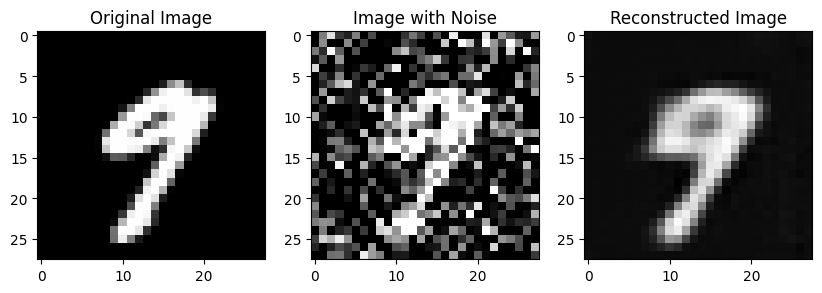

Mean Squared Error between the original and reconstructed image: 0.04596269875764847


In [51]:
from keras.models import load_model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


# Cargar el modelo
autoencoder = load_model('autoencoder_model_2.h5')

# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape para ser [samples][width][height][channels]
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Convertir de int a float
x_test = x_test.astype('float32')

# Normalizar las imágenes a [0, 1]
x_test /= 255

# Agregar ruido gaussiano a las imágenes de prueba
noise_factor = 0.5
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# Asegurando que los valores estén entre 0 y 1
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Seleccionar una imagen con ruido para probar
img_index = 20 # Añade esta línea
img = x_test_noisy[img_index]

# Agregar una dimensión extra para indicar el número de imágenes (1 en este caso)
img = np.expand_dims(img, axis=0)

# Obtener la imagen reconstruida del autoencoder
reconstructed_img = autoencoder.predict(img)

# La imagen reconstruida estará en la forma (1, 28, 28, 1). 
# Para visualizarla, necesitamos eliminar las dimensiones extra y convertirla a la forma (28, 28).
reconstructed_img = np.squeeze(reconstructed_img)

# Visualizar la imagen original, la imagen con ruido y la imagen reconstruida
plt.figure(figsize=(10, 7))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(np.squeeze(x_test[img_index]), cmap='gray')
plt.title('Original Image')

# Imagen con ruido
plt.subplot(1, 3, 2)
plt.imshow(np.squeeze(x_test_noisy[img_index]), cmap='gray')
plt.title('Image with Noise')

# Imagen reconstruida
plt.subplot(1, 3, 3)
plt.imshow(reconstructed_img, cmap='gray')
plt.title('Reconstructed Image')

plt.show()


# Cargar la imagen original
original_img = np.squeeze(x_test[img_index])

# Calcular el MSE
mse = mean_squared_error(original_img.flatten(), reconstructed_img.flatten())

# Imprimir el MSE
print(f"Mean Squared Error between the original and reconstructed image: {mse}")

**Transfer learning**

Entendemos este problema como que la IA tiene que aprender a dibujar estos números en base a data con ruido , aprender los patrones, los angulos , las rectas ylos vecinos mas próximos, por lo que al igual que el aprendizaje de humanos para aprender a dibujar los niños realizan dibujos de formas geometricas que los entrenen para posteriormente dibujar los números.

Por lo que en un notebook aparte generamos un dataset sintetico con imagenes de 28x28 similares a las de mnist y entreno con un arquitectura igual para posteriormente traer esos pesos para un nuevo entrenamiento con el mnist.

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 47ms/step - loss: 0.6467 - val_loss: 0.5224
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - loss: 0.5252 - val_loss: 0.5205
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - loss: 0.5237 - val_loss: 0.5195
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - loss: 0.5230 - val_loss: 0.5189
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - loss: 0.5224 - val_loss: 0.5185
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - loss: 0.5220 - val_loss: 0.5182
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - loss: 0.5218 - val_loss: 0.5180
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - loss: 0.5215 - val_loss: 0.5177
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - loss: 0.5213 - val_loss: 0.5178
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - loss: 0.5212 - val_loss: 0.5176
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - loss: 0.5209 - val_loss: 0.5174
Epoch 12/20
938/938 ━━━━━━━━━━

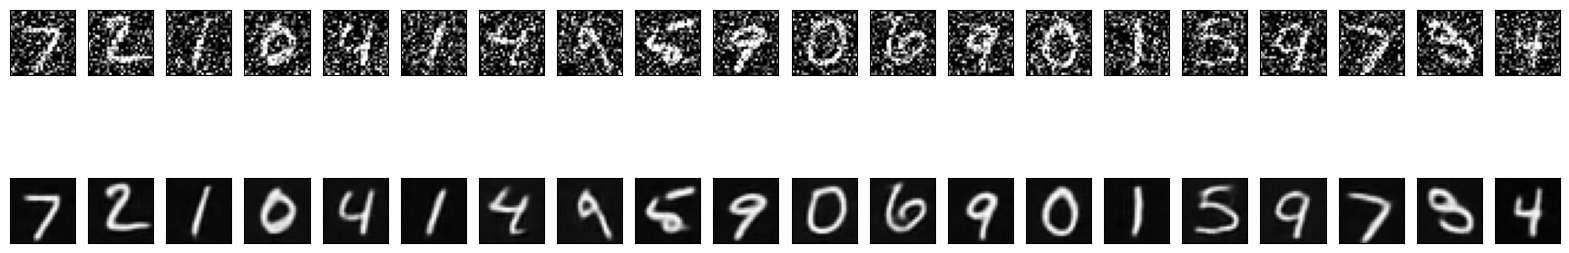

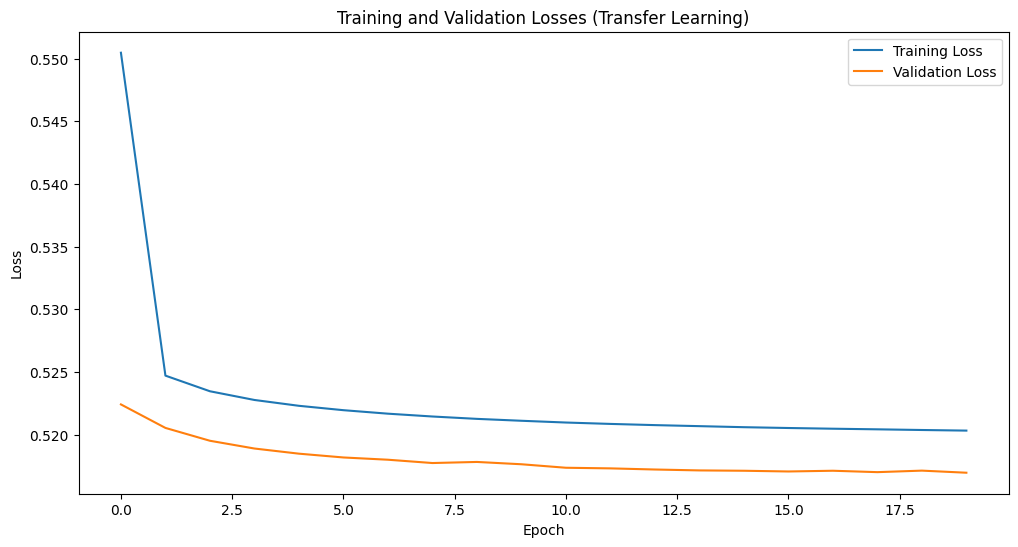

In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Cargar el modelo preentrenado
autoencoder = tf.keras.models.load_model('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/autoencoder_model_forms_architecture.h5')

# Definir hiperparámetros
batch_size = 128
epochs = 20
learning_rate = 0.0005  # Reducido para ajuste fino

# Hacer ajustes en las capas del modelo
for layer in autoencoder.layers[-3:]:  # Descongelar las últimas tres capas
    layer.trainable = True
    if hasattr(layer, 'rate'):  # Añadir Dropout si es una capa Conv2D y no tiene Dropout
        layer.rate = 0.5

# Compilar el modelo cargado con ajustes de tasa de aprendizaje reducida para ajuste fino
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy')

# Entrenar el modelo
history_transfer_learning = autoencoder.fit(
    x_train_noisy, x_train_noisy_2,
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(x_test_noisy, x_test_noisy_2)
)

# Testear el modelo
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualización de resultados
n = 20
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Guardar el modelo actualizado (opcional)
autoencoder.save('autoencoder_model_transfer_learning.h5')

# Graficar las curvas de pérdida de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history_transfer_learning.history['loss'], label='Training Loss')
plt.plot(history_transfer_learning.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Losses (Transfer Learning)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


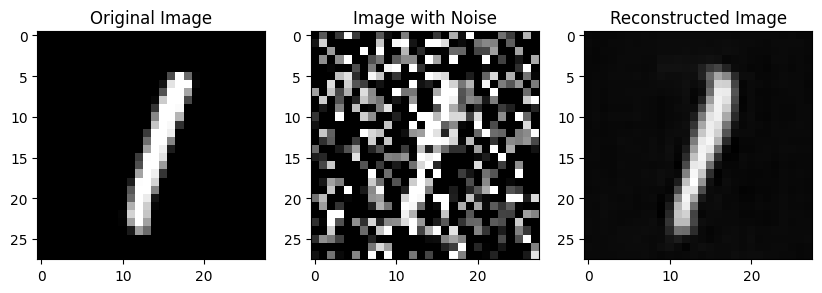

Mean Squared Error between the original and reconstructed image: 0.040917836129665375


In [37]:
from keras.models import load_model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Cargar el modelo
autoencoder = load_model('autoencoder_model_transfer_learning.h5')

# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape para ser [samples][width][height][channels]
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Convertir de int a float
x_test = x_test.astype('float32')

# Normalizar las imágenes a [0, 1]
x_test /= 255

# Agregar ruido gaussiano a las imágenes de prueba
noise_factor = 0.7
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# Asegurando que los valores estén entre 0 y 1
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Seleccionar una imagen con ruido para probar
img_index = 5 # Añade esta línea
img = x_test_noisy[img_index]

# Agregar una dimensión extra para indicar el número de imágenes (1 en este caso)
img = np.expand_dims(img, axis=0)

# Obtener la imagen reconstruida del autoencoder
reconstructed_img = autoencoder.predict(img)

# La imagen reconstruida estará en la forma (1, 28, 28, 1). 
# Para visualizarla, necesitamos eliminar las dimensiones extra y convertirla a la forma (28, 28).
reconstructed_img = np.squeeze(reconstructed_img)

# Visualizar la imagen original, la imagen con ruido y la imagen reconstruida
plt.figure(figsize=(10, 7))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(np.squeeze(x_test[img_index]), cmap='gray')
plt.title('Original Image')

# Imagen con ruido
plt.subplot(1, 3, 2)
plt.imshow(np.squeeze(x_test_noisy[img_index]), cmap='gray')
plt.title('Image with Noise')

# Imagen reconstruida
plt.subplot(1, 3, 3)
plt.imshow(reconstructed_img, cmap='gray')
plt.title('Reconstructed Image')

plt.show()

# Guardar el modelo actualizado (opcional)
autoencoder.save('autoencoder_model_transfer_learning_updated.h5')

# Cargar la imagen original
original_img = np.squeeze(x_test[img_index])

# Calcular el MSE
mse = mean_squared_error(original_img.flatten(), reconstructed_img.flatten())

# Imprimir el MSE
print(f"Mean Squared Error between the original and reconstructed image: {mse}")